# Data Exploration of `pubs.csv`
(File obtained after cleaning with `clean_data.ipynb`)

Imports & installations (uncomment to install)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import missingno as msno

In [2]:
# !pip install matplotlib

In [3]:
# !pip install seaborn

In [4]:
# !pip install missingno

## Exploratory Data Analysis

In [44]:
df = pd.read_csv("data/cleaned/pubs.csv")
# df.head()

C:\Users\20211831\AppData\Local\Temp\ipykernel_21048\1888714913.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/cleaned/pubs.csv")


In [6]:
df.describe(include='all')

,integer_id,thesis_identifier,institution,author_name,title,year,language,contributor_1,contributor_2,contributor_3,contributor_4,contributor_5,contributor_6,contributor_7,contributor_8,contributor_9,contributor_10
count,94299.000000,94299,94299,94299,94299,94299.000000,94299,94294,60203,23700,7550,2964,1333,500,138,30,4
unique,NaN,93235,26,87897,88864,NaN,19,15717,21336,11723,4378,1908,993,418,120,28,3
top,NaN,http://hdl.handle.net/1887/58921,rug,"Wang, Y.",The volatile metabolome and microbiome in pulm...,NaN,en,"Wetenschappen/UMCG, F.M.","Wetenschappen/UMCG, F.M.","Wetenschappen/UMCG, F.M.","Stan Ackermans Instituut, C.v.T.O.","Stan Ackermans Instituut, C.v.T.O.","Stan Ackermans Instituut, C.v.T.O.","Eliel, E.","Pijl, H.","Fennell, D.","Berlin, I."
freq,NaN,2,11249,32,4,NaN,78936,1041,754,420,197,75,17,6,3,2,2
mean,68971.288455,NaN,NaN,NaN,NaN,2008.862119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,35396.642262,NaN,NaN,NaN,NaN,13.208652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,1879.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,43112.500000,NaN,NaN,NaN,NaN,2004.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,69949.000000,NaN,NaN,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,99392.500000,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Missing values

Uncomment cells for more detailed information and graphs

In [8]:
df.isnull().sum()

integer_id               0
thesis_identifier        0
institution              0
author_name              0
title                    0
year                     0
language                 0
contributor_1            5
contributor_2        34096
contributor_3        70599
contributor_4        86749
contributor_5        91335
contributor_6        92966
contributor_7        93799
contributor_8        94161
contributor_9        94269
contributor_10       94295
dtype: int64

In [29]:
# msno.bar(df)

In [30]:
# sns.heatmap(df.isnull(), cmap='viridis')
# plt.show()

In [31]:
# missing_rows = df[df.isnull().any(axis=1)]
# print(missing_rows)

#### Institutions 

In [12]:
# grouping by institution to obtain counts
df_grouped_by_institution = df.groupby(pd.Grouper(key='institution')).size()
print(df_grouped_by_institution)

institution
amcpub             2939
buas                 40
cwi                   4
eur                6441
amsterdam_pure       39
hanzepure            55
lumc                905
naturalis             5
ou                  338
ru                    1
rug               11249
tno                  48
tud                7834
tue                9163
ul                 6169
uls                   1
um                 6349
umcu               2223
ut                 5271
uu                 4210
uvapub            10673
uvh                 149
uvt                2432
vu                 7346
vumc               2183
wur                8232
dtype: int64
26


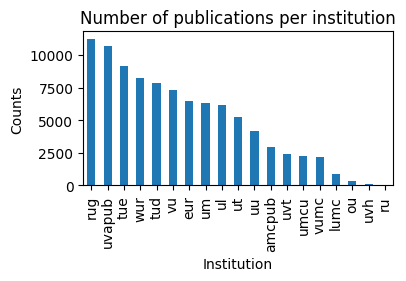

In [40]:
# descending order
sorted_counts = df_grouped_by_institution.sort_values(ascending=False)
# plot the sorted counts
sorted_counts.plot.bar(figsize=(4, 2))
plt.title('Number of publications per institution')
plt.xlabel('Institution')
plt.ylabel('Counts')
plt.show()

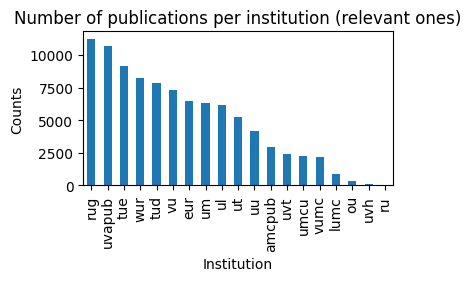

In [41]:
relevant_institutions = ['amcpub', 'eur', 'lumc', 'uvt', 'ou', 'ru', 'vu', 'rug', 'vumc', 'tud', 'tue', 'wur', 'ul', 'um', 'umcu', 'ut', 'uu', 'uvapub', 'uvh']

filtered_df = df[df['institution'].isin(relevant_institutions)]
df_grouped_by_institution = filtered_df.groupby(pd.Grouper(key='institution')).size()

# descending order
sorted_counts = df_grouped_by_institution.sort_values(ascending=False)
# plot the sorted counts for relevant institutions
sorted_counts.plot.bar(figsize=(4, 2))
plt.title('Number of publications per institution (relevant ones)')
plt.xlabel('Institution')
plt.ylabel('Counts')
plt.show()


#### Time trends 
For all institutions (for relevant change `df` to `filtered_df`)

In [45]:
# change values of "year" column to datem=time
for index, value in enumerate(df['year']):
    df.at[index, 'year'] = datetime.strptime(str(value), '%Y')
    
# df.head()

C:\Users\20211831\AppData\Local\Temp\ipykernel_21048\2929236597.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2016-01-01 00:00:00' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[index, 'year'] = datetime.strptime(str(value), '%Y')


year
1879-12-31       1
1880-12-31       0
1881-12-31       0
1882-12-31       0
1883-12-31       0
              ... 
2018-12-31    4918
2019-12-31    4958
2020-12-31    4812
2021-12-31    4993
2022-12-31    4265
Freq: A-DEC, Length: 144, dtype: int64


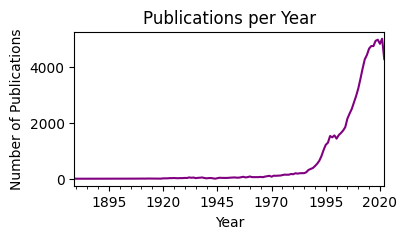

In [47]:
# grouping by year to obtain publications per year 
df_per_year = df.groupby(pd.Grouper(key='year', freq='Y')).size()
print(df_per_year)

df_per_year.plot(kind='line', figsize=(4, 2), c='purple')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.title('Publications per Year')
plt.show()

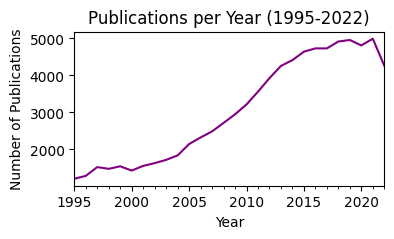

In [48]:
# investigate the increase in publications
start_date = pd.to_datetime('1995-01-01')
end_date = pd.to_datetime('2022-12-31')
filtered_df = df[(df['year'] >= start_date) & (df['year'] <= end_date)]

# grouping by year and counting the number of pubs
df_per_year = filtered_df.groupby(pd.Grouper(key='year', freq='Y')).size()

df_per_year.plot(kind='line', figsize=(4, 2), c='purple')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.title('Publications per Year (1995-2022)')
plt.show()


### Collaborators
For each publication (row) add the number of collaborators

In [50]:
def count_non_null(row):
    return row.iloc[7:17].count()

df['nr_of_contributors'] = df.apply(count_non_null, axis=1)

df.head()

,integer_id,thesis_identifier,institution,author_name,title,year,language,contributor_1,contributor_2,contributor_3,contributor_4,contributor_5,contributor_6,contributor_7,contributor_8,contributor_9,contributor_10,nr_of_contributors
0,1,https://pure.amc.nl/en/publications/structure-...,amcpub,"Azaripour, Adriano",Structure and function of the human periodonti...,2016-01-01 00:00:00,en,"van Noorden, C.J.F.","Willershausen, B.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,2,https://pure.amc.nl/en/publications/neurocogni...,amcpub,"Thissen, Andrieke J. A. M.",Neurocognitive and genetic factors in ADHD acr...,2014-01-01 00:00:00,en,"Buitelaar, J.K.","Franke, B.","Lambregts-Rommelse, N.N.J.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
2,3,https://pure.amc.nl/en/publications/quality-of...,amcpub,"van Huis, Maike",Quality of care and monitoring in paediatric e...,2016-01-01 00:00:00,en,"van Goudoever, H.B.","Groothoff, J.W.","van der Lee, H.H.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,4,https://pure.amc.nl/en/publications/optimizing...,amcpub,"Creemers, Huub",Optimizing quality of care for patients with A...,2016-01-01 00:00:00,en,"van den Berg, L.H.","Beelen, A.A.J.M.","Veldink, J.H.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,5,https://pure.amc.nl/en/publications/bridging-t...,amcpub,"Verlaan, Tessa",Bridging the gap between gastrointestinal endo...,2016-01-01 00:00:00,en,"Fockens, P.","Bemelman, W.A.","van Hooft, J.E.","van Berge Henegouwen, M.I.",NaN,NaN,NaN,NaN,NaN,NaN,4


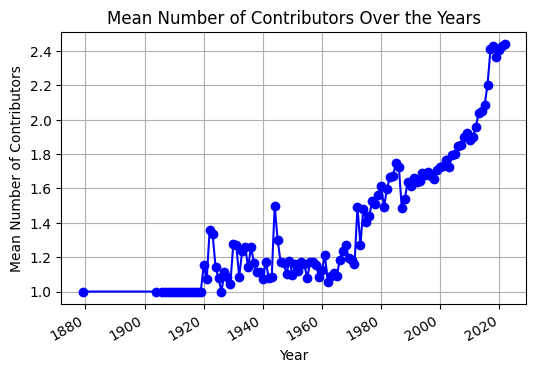

In [74]:
# plotting mean number of contributors
mean_contributors = df.groupby('year')['nr_of_contributors'].mean()

mean_contributors.plot(kind='line', marker='o', color='b', linestyle='-', figsize=(6, 4))
plt.title('Mean Number of Contributors Over the Years')
plt.xlabel('Year')
plt.ylabel('Mean Number of Contributors')
plt.grid(True)
plt.show()

### Duplicates
Are there any non-unique publication records? How are they created?

In [25]:
duplicates_in_columns = df.apply(lambda x: x.duplicated().sum())

print(duplicates_in_columns)

integer_id                0
thesis_identifier      1064
institution           94273
author_name            6402
title                  5435
year                  94180
language              94280
contributor_1         78581
contributor_2         72962
contributor_3         82575
contributor_4         89920
contributor_5         92390
contributor_6         93305
contributor_7         93880
contributor_8         94178
contributor_9         94270
contributor_10        94295
nr_of_contributors    94289
dtype: int64


For "thesis_identifier" duplicated publications appear only x2 at most - due to **publishing via 2 institutions**

In [61]:
duplicate_rows = df[df.duplicated(subset=["thesis_identifier"], keep=False)]
df_sorted = duplicate_rows.sort_values(by="thesis_identifier")
df_sorted.reset_index(drop=True, inplace=True)

df_sorted.head(2)

,integer_id,thesis_identifier,institution,author_name,title,year,language,contributor_1,contributor_2,contributor_3,contributor_4,contributor_5,contributor_6,contributor_7,contributor_8,contributor_9,contributor_10,nr_of_contributors
0,64145,http://hdl.handle.net/1887/11006,ul,"Campen, M. van",Gans Israël : Voetiaanse en Coccejaanse visies...,2006-01-01 00:00:00,nl,"Wall, E.v.d.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,64086,http://hdl.handle.net/1887/11006,ul,"Campen, M. van",Gans Israël : Voetiaanse en Coccejaanse visies...,2006-01-01 00:00:00,nl,"Wall, E.v.d.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


Similar with "title", however there are at most 4 duplicates, with indicates **publishing under 2+ institutions**. Also shows how "author_name" is not standardized.
A unique record may be extracted by grouping on these columns.

In [70]:
duplicate_rows = df[df.duplicated(subset=["title"], keep=False)]
df_sorted = duplicate_rows.sort_values(by="title")
df_sorted.reset_index(drop=True, inplace=True)

df_sorted.head(4)

,integer_id,thesis_identifier,institution,author_name,title,year,language,contributor_1,contributor_2,contributor_3,contributor_4,contributor_5,contributor_6,contributor_7,contributor_8,contributor_9,contributor_10,nr_of_contributors
0,114829,https://research.vu.nl/en/publications/f91709b...,vu,"Groot, R.","""Diffuse sclerosing osteomyelitis of mandible:...",1995-01-01 00:00:00,und,"Kusen, G.","van Merkesteyn, J.","Bras, J.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
1,92109,https://dare.uva.nl/personal/pure/en/publicati...,uvapub,"Groot, R.","""Diffuse sclerosing osteomyelitis of mandible:...",1995-01-01 00:00:00,und,"Kusen, G.","van Merkesteyn, J.","Bras, J.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
2,67870,http://hdl.handle.net/1887/3479752,ul,"Duijster, J.W.","""Driver or passenger"" : an integrated epidemio...",2022-01-01 00:00:00,en,"Neefjes, J.","Mughini-Gras, L.","Franz, E.","Baarle, D.v.",NaN,NaN,NaN,NaN,NaN,NaN,4
3,12248,http://hdl.handle.net/1887/3479752,lumc,"Duijster, J.W.","""Driver or passenger"" : an integrated epidemio...",2022-01-01 00:00:00,en,"Neefjes, J.","Mughini-Gras, L.","Franz, E.","Baarle, D.v.",NaN,NaN,NaN,NaN,NaN,NaN,4


In [69]:
more_than_2_dup = df_sorted.groupby('title').filter(lambda x: len(x) > 2)
more_than_2_dup.head(6)

,integer_id,thesis_identifier,institution,author_name,title,year,language,contributor_1,contributor_2,contributor_3,contributor_4,contributor_5,contributor_6,contributor_7,contributor_8,contributor_9,contributor_10,nr_of_contributors
66,66729,http://hdl.handle.net/1887/72513,ul,"Geerse, D.J.",A comprehensive approach to assess walking abi...,2019-01-01 00:00:00,en,"Hilten, J.v.","Marinus, J.","Roerdink, M.","Bloem, B.","Pijnappels, M.",NaN,NaN,NaN,NaN,NaN,5
67,107534,https://research.vu.nl/en/publications/24d3e1b...,vu,"Geerse, Daphne",A comprehensive approach to assess walking abi...,2019-01-01 00:00:00,en,"Roerdink, M.","Marinus, J.","van Hilten, J.J.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
68,11887,http://hdl.handle.net/1887/72513,lumc,"Geerse, D.J.",A comprehensive approach to assess walking abi...,2019-01-01 00:00:00,en,"Hilten, J.v.","Marinus, J.","Roerdink, M.","Bloem, B.","Pijnappels, M.",NaN,NaN,NaN,NaN,NaN,5
275,1188,https://pure.amc.nl/en/publications/adipose-st...,amcpub,"Kroeze, Robert J.",Adipose stem cells on a biodegradable polymer ...,2014-01-01 00:00:00,en,"van Royen, B.J.","Smit, T.H.","Helder, M.N.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
276,115129,https://research.vumc.nl/en/publications/07ad8...,vumc,"Kroeze, R.J.",Adipose stem cells on a biodegradable polymer ...,2014-01-01 00:00:00,und,"van Royen, B.","Smit, T.","Helder, M.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
277,106825,https://research.vu.nl/en/publications/0ed9ec1...,vu,"Kroeze, R.J.",Adipose stem cells on a biodegradable polymer ...,2014-01-01 00:00:00,en,"van Royen, B.","Smit, T.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
